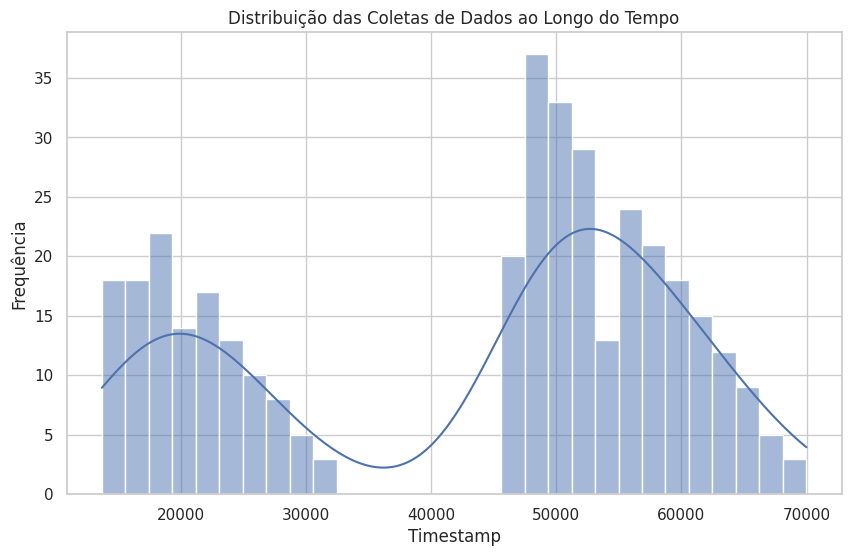

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# --- Carregamento e Preparação Básica dos Dados ---

df = pd.read_csv('dado_sensor_esp32.csv')

def parse_sensors(sensor_string):
    try:
        return ast.literal_eval(sensor_string)
    except (ValueError, SyntaxError):
        return None

df['sensors_dict'] = df['sensors'].apply(parse_sensors)
df.dropna(subset=['sensors_dict'], inplace=True)

# --- Apenas o Gráfico de Distribuição dos Timestamps ---

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['timestamp'], kde=True, bins=30)
plt.title('Distribuição das Coletas de Dados ao Longo do Tempo')
plt.xlabel('Timestamp')
plt.ylabel('Frequência')
plt.show()

## Analise exploratória

Este gráfico mostra a distribuição das coletas de dados ao longo do tempo, com base nos valores de timestamp. O que percebo é que as coletas não ocorreram de forma contínua — existem dois períodos bem definidos de atividade, separados por um intervalo onde quase não houve registros.

Essa lacuna pode indicar uma interrupção temporária no funcionamento dos sensores, uma pausa proposital no processo de coleta, ou até alguma instabilidade no envio dos dados.

Além disso, a segunda fase de coleta apresenta uma frequência maior de dados, o que pode sugerir que, nesse período, os dispositivos estavam operando de forma mais estável ou por mais tempo. Esse tipo de análise é importante para entender o comportamento do sistema de monitoramento ao longo do tempo e identificar possíveis falhas ou padrões operacionais.